In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Embiggen
from pylab import rcParams
rcParams['figure.figsize'] = 12, 7    

Actual i    =  0.08
Estimated i =  0.0658654470772
Actual var  =  0.015
Estimated var= 0.0107868506308


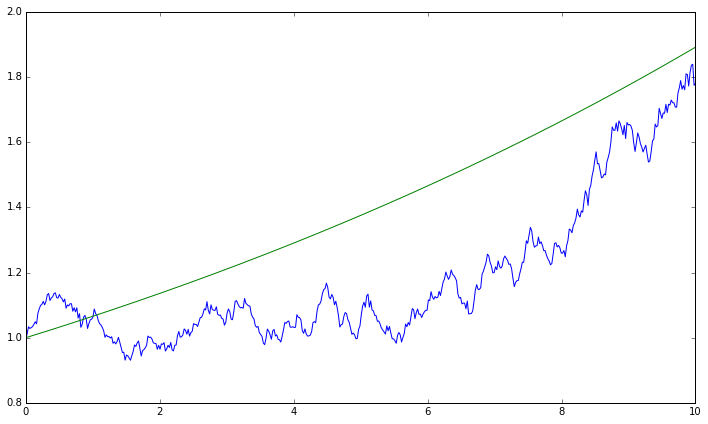

In [33]:
# Set Parameters
eps = 0.015
n = 500
i = 0.08
time = 10.
delta = np.log(1+i)



x = np.linspace(0,time,n)
noise = np.cumsum(np.random.normal(0,1,n))
y = np.exp(delta*x + eps*noise)

m = 1000


sigma_sqred = np.var(y)

x_k = n*[0]


for j in range(1,n):
    x_k[j] = np.log(y[j]/y[j-1])


mu = np.mean(x_k)
nu_sqred = np.var(x_k)


del_t = time/n

sigma_sqred = nu_sqred/del_t
r1 = mu/del_t + 0.5*sigma_sqred

i2 = np.exp(r1) - 1

print("Actual i    = ", i)
print("Estimated i = ",i2)
print("Actual var  = ", eps)
print("Estimated var=", sigma_sqred)


plt.plot(x,y)
plt.plot(x,np.exp(r1*x))

Actual i    =  0.06
Estimated i =  0.0941082393491
Actual var  =  0.01
Estimated var= 0.00562563052639


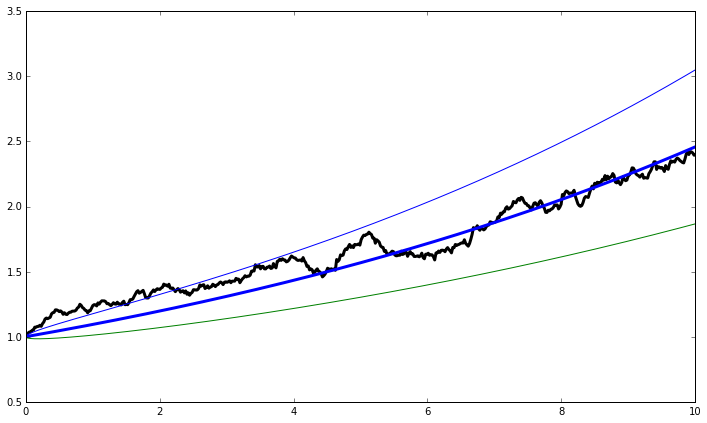

In [3]:
# Set Parameters
eps = 0.01
n = 520
i = 0.06
time = 10.
delta = np.log(1+i)



x = np.linspace(0,time,n)
noise = np.cumsum(np.random.normal(0,1,n))
y = np.exp((delta-0.5*eps**2)*x + eps*noise)


sigma_sqred = np.var(y)

x_k = n*[0]


for j in range(1,n):
    x_k[j] = np.log(y[j]/y[j-1])


mu = np.mean(x_k)
nu_sqred = np.var(x_k)


del_t = time/n

sigma_sqred = nu_sqred/del_t
r1 = mu/del_t + 0.5*sigma_sqred

i2 = np.exp(r1) - 1

print("Actual i    = ", i)
print("Estimated i = ",i2)
print("Actual var  = ", eps)
print("Estimated var=", sigma_sqred)


plt.plot(x, y, color = 'k', linewidth = '3')
plt.plot(x, np.exp(r1*x), linewidth = '3')
plt.plot(x, np.exp(r1*x)*(1 + np.sqrt( np.exp(sigma_sqred*x) -1 )), color ='blue' )
plt.plot(x, np.exp(r1*x)*(1 - np.sqrt( np.exp(sigma_sqred*x) -1 )) )

Actual i    =  0.06
Estimated i =  0.0721208609478
M1 i        =  0.0664801918699
Actual var  =  0.01
Estimated var= 0.0105502279645


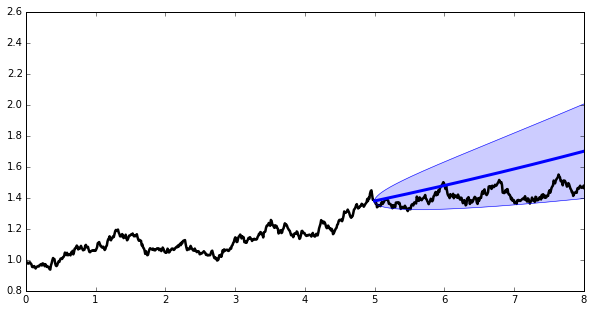

In [15]:
# Set Parameters
eps = 0.01
n = 1000
i = 0.06
time = 10.
delta = np.log(1+i)


x = np.linspace(0,time,n)
noise = np.cumsum(np.random.normal(0,1,n))
y = np.exp((delta-0.5*eps**2)*x + eps*noise)

y_train = y[:n/2]



sigma_sqred = np.var(y_train)

x_k = int(n/2)*[0]


for j in range(1,int(n/2)):
    x_k[j] = np.log(y_train[j]/y_train[j-1])


mu = np.mean(x_k)
nu_sqred = np.var(x_k)


del_t = time/n

sigma_sqred = nu_sqred/del_t
r1 = mu/del_t + 0.5*sigma_sqred

i2 = np.exp(r1) - 1

print("Actual i    = ", i)
print("Estimated i = ",i2)
print("M1 i        = ", (y_train[int(n/2)-1]/y_train[0])**0.2 - 1)


print("Actual var  = ", eps)
print("Estimated var=", sigma_sqred)


x_half = x[:int(n/2)] + 5


future_stock = y[int(n/2)]*np.exp(r1* (x_half-5.))
future_upper = y[int(n/2)]*np.exp(r1*(x_half-5.))*(1 + np.sqrt( np.exp(sigma_sqred*(x_half-5.)) -1 ))
future_lower = y[int(n/2)]*np.exp(r1*(x_half-5.))*(1 - np.sqrt( np.exp(sigma_sqred*(x_half-5.)) -1 ))

plt.plot(x, y, color = 'k', linewidth = '2.5')
plt.plot(x_half, future_stock, linewidth = '3')
plt.plot(x_half, future_upper, color ='blue', linewidth = '0.5' )
plt.plot(x_half, future_lower, color = 'blue', linewidth = '0.5' )

plt.xlim(0,8)

plt.fill_between(x_half ,future_upper, future_lower, color='b', alpha='0.2')

In [11]:
# Embiggen

"""
Create exponential curve with Gaussian randomness. 
Get rate of return from curve fitting. Get rate of return from first and last value.
Compare both methods with actual value.
"""


from pylab import rcParams
rcParams['figure.figsize'] = 10, 5    

# Set Parameters
eps = 0.1
n = 1000
i = 0.08
time = 10
delta = np.log(1+i)

m = 1000

x = np.linspace(0,time,n)

method1_is = m*[0]
bestfit_is = m*[0]
geobrownis = m*[0]

for j in range(m):
    # Creates arrays


    noise = np.cumsum(np.random.normal(0,1,n))

    y = np.exp((delta-0.5*eps**2)*x + eps*noise)

    def func(t, a, c):
        return a*np.exp(c*t)

    popt, pcov = curve_fit(func, x, y, p0=(1, 0.075))

    a = popt[0]
    c = popt[1]

    z = a*np.exp(c*x) 

    i2 = (y[n-1]/y[0])**(1/time) -1
    delta2 = np.log(1 + i2) 
    
    sigma_sqred = np.var(y)

    x_k = n*[0]


    for j in range(1,n):
        x_k[j] = np.log(y[j]/y[j-1])


    mu = np.mean(x_k)
    nu_sqred = np.var(x_k)


    del_t = time/n

    sigma_sqred = nu_sqred/del_t
    r1 = mu/del_t + 0.5*sigma_sqred

    i3 = np.exp(r1) - 1  
       
    method1_is[j] = i2
    bestfit_is[j] = c
    geobrownis[j] = i3

    

MSE1 = sum((method1_is - i*np.ones(m))**2)
MSEbf = sum((bestfit_is - i*np.ones(m))**2)
MSEgb = sum((geobrownis - i*np.ones(m))**2)

print("MSE of method one = ", MSE1)
print("MSE of best fit   = ", MSEbf)
print("MSE of geo-brown  = ", MSEgb)

MSE of method one =  6.39765788098
MSE of best fit   =  6.4152978085
MSE of geo-brown  =  6.76146484475
